In [1]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
from datetime import datetime

In [64]:
#Archivo de duracion de los viajes
trips_all=pd.read_csv("trip.csv")
trips=trips_all.loc[trips_all.start_date.str.contains('4/'+'\S'+'/2014')]
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
283460,243090,186,4/9/2014 23:33,Commercial at Montgomery,45,4/9/2014 23:36,Market at Sansome,77,397,Subscriber,94112
283461,243089,184,4/9/2014 23:32,Redwood City Caltrain Station,22,4/9/2014 23:35,Mezes Park,83,216,Subscriber,94063
283462,243088,765,4/9/2014 23:31,Embarcadero at Sansome,60,4/9/2014 23:43,Market at 4th,76,267,Subscriber,94108
283463,243087,1006,4/9/2014 23:29,San Francisco Caltrain (Townsend at 4th),70,4/9/2014 23:46,San Francisco Caltrain (Townsend at 4th),70,512,Customer,94127
283464,243086,328,4/9/2014 23:21,Steuart at Market,74,4/9/2014 23:26,Davis at Jackson,42,620,Subscriber,94111


In [65]:
#trips[trips['start_day']== datetime(2014,4,9)]
#trips.sort_values('start_date')

In [66]:
,#Archivo de clima
weather_all=pd.read_csv("weather.csv")
weather = weather_all.loc[weather_all.date.str.contains('4/'+'\S'+'/2014')]
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
951,4/1/2014,58.0,52.0,46.0,47.0,43.0,41.0,82.0,72.0,61.0,...,9.0,2.0,30.0,13.0,36.0,0.69,7.0,Rain,158.0,94107
952,4/2/2014,61.0,53.0,45.0,45.0,43.0,39.0,89.0,68.0,46.0,...,10.0,10.0,21.0,8.0,28.0,T,4.0,Rain,357.0,94107
953,4/3/2014,62.0,54.0,46.0,46.0,44.0,42.0,86.0,69.0,51.0,...,10.0,10.0,16.0,8.0,20.0,0,5.0,NaN,211.0,94107
954,4/4/2014,61.0,56.0,50.0,49.0,46.0,43.0,86.0,71.0,55.0,...,9.0,4.0,22.0,8.0,28.0,0.32,6.0,Rain,292.0,94107
955,4/5/2014,65.0,56.0,46.0,49.0,46.0,43.0,86.0,71.0,56.0,...,10.0,10.0,17.0,7.0,21.0,0,2.0,NaN,292.0,94107


In [67]:
weather[weather['date']=='4/1/2014'] #hay varias temperaturas para un dia, depende del zip_code que tmb esta en trips

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
951,4/1/2014,58.0,52.0,46.0,47.0,43.0,41.0,82.0,72.0,61.0,...,9.0,2.0,30.0,13.0,36.0,0.69,7.0,Rain,158.0,94107
1135,4/1/2014,57.0,50.0,44.0,46.0,43.0,39.0,100.0,86.0,51.0,...,10.0,4.0,15.0,7.0,21.0,0,5.0,Rain,162.0,94063
1319,4/1/2014,59.0,52.0,46.0,48.0,44.0,43.0,93.0,76.0,55.0,...,12.0,6.0,17.0,10.0,NaN,0,7.0,Rain,167.0,94301
1503,4/1/2014,60.0,53.0,45.0,45.0,43.0,41.0,92.0,74.0,55.0,...,10.0,4.0,20.0,8.0,24.0,0.36,5.0,Rain,148.0,94041
1687,4/1/2014,57.0,50.0,43.0,46.0,43.0,38.0,100.0,80.0,59.0,...,10.0,6.0,23.0,10.0,32.0,0.29,6.0,Rain,128.0,95113


In [68]:
#dia-temperatura-duracion
trips_reducido = trips[['start_date','duration','zip_code']]
weather_reducido = weather[['date','mean_temperature_f','zip_code']]

In [71]:
trips_reducido['start_date']=trips_reducido.start_date.map(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M') )
weather_reducido['date']=weather_reducido.date.map(lambda x: datetime.strptime(x, '%m/%d/%Y') )

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


TypeError: must be string, not Timestamp

In [82]:
#trips_reducido['temperature']=weather_reducido[trips_reducido['start_date'],'mean_temperatura_f'] #EN REALIDAD TRIPS_REDUCIDO NO SE GUARDA EN EL ORDEN QUE QUIERO, ENTONCES NO PUEDO HACER ESTO
#datos.ix[['cam01', 'tur03', 'pet05'], 'peso']

##trips_reducido['duration'].corr(trips_reducido['start_date'])
#weather_reducido.corr()
#datos['tamano'].corr(datos['peso'])

#dt=datetime.strptime('4/9/2014 23:33', '%m/%d/%Y %H:%M')

trips_reducido['start_day']=trips_reducido.start_date.map(lambda x: x.date() ) #para ponerlo igual que en weather

weather_reducido['start_day']=weather_reducido.date.map(lambda x: x.date() )

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [83]:
trips_reducido.head()

,start_date,duration,zip_code,start_day
283460,2014-04-09 23:33:00,186,94112,2014-04-09
283461,2014-04-09 23:32:00,184,94063,2014-04-09
283462,2014-04-09 23:31:00,765,94108,2014-04-09
283463,2014-04-09 23:29:00,1006,94127,2014-04-09
283464,2014-04-09 23:21:00,328,94111,2014-04-09


In [84]:
weather_reducido.head()

,date,mean_temperature_f,zip_code,start_day
951,2014-04-01,52.0,94107,2014-04-01
952,2014-04-02,53.0,94107,2014-04-02
953,2014-04-03,54.0,94107,2014-04-03
954,2014-04-04,56.0,94107,2014-04-04
955,2014-04-05,56.0,94107,2014-04-05


In [97]:
weather_reducido['zip_code'].values

array([94107, 94107, 94107, 94107, 94107, 94107, 94107, 94107, 94107,
       94063, 94063, 94063, 94063, 94063, 94063, 94063, 94063, 94063,
       94301, 94301, 94301, 94301, 94301, 94301, 94301, 94301, 94301,
       94041, 94041, 94041, 94041, 94041, 94041, 94041, 94041, 94041,
       95113, 95113, 95113, 95113, 95113, 95113, 95113, 95113, 95113])

In [98]:
trips_reducido['zip_code'].values

array(['94112', '94063', '94108', ..., '94116', '94133', '94022'], dtype=object)

In [103]:
temp_duration=pd.merge( weather_reducido[['start_day','zip_code','mean_temperature_f']], trips_reducido[['start_day','zip_code','duration']],on=['start_day','zip_code'],how='inner')

In [104]:
temp_duration.sort_values('start_day',ascending=False)


,start_day,zip_code,mean_temperature_f,duration


In [102]:
temp_duration.dropna(how='any')

,start_day,zip_code,mean_temperature_f,duration


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


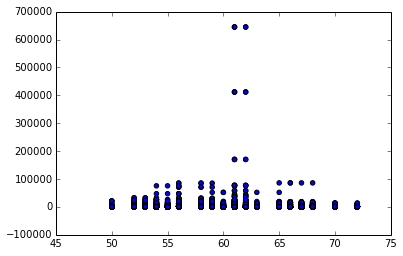

In [70]:
%matplotlib inline
plot.scatter(temp_duration['mean_temperature_f'], temp_duration['duration'])
